# **Testing the Auction module**

In [33]:
import sys
import numpy as np
from importlib import reload
sys.path.append("../")

import auction
reload(auction)

<module 'auction' from '../auction.py'>

## **Functionality testing**

### Small sample

In [38]:
starting_prices = np.random.normal(300, 15, 10)

def preference_function(buyer_id, auction_ids, current_prices):
    return np.argmin(current_prices)

In [35]:
auctions = [auction.Auctioneer(starting_prices[i], 10, "auc%d"%i) for i in range(10)]
buyers = [auction.Buyer(auctions, 5000, preference_function, "buy%d"%i) for i in range(10)]

In [36]:
result = auction.run_auctions(auctions, buyers)

8 out of 10 auctions are won
2 out of 2 auctions are won


In [37]:
result

[{'auction_id': 'auc0', 'buyer_id': 'buy2', 'price': 313.2114553146565},
 {'auction_id': 'auc2', 'buyer_id': 'buy9', 'price': 321.1467422720572},
 {'auction_id': 'auc3', 'buyer_id': 'buy6', 'price': 317.65359818716695},
 {'auction_id': 'auc4', 'buyer_id': 'buy4', 'price': 313.7055038693609},
 {'auction_id': 'auc6', 'buyer_id': 'buy3', 'price': 313.23365347999334},
 {'auction_id': 'auc7', 'buyer_id': 'buy8', 'price': 320.6003527890358},
 {'auction_id': 'auc8', 'buyer_id': 'buy7', 'price': 318.78539480581},
 {'auction_id': 'auc9', 'buyer_id': 'buy5', 'price': 315.33836073361385},
 {'auction_id': 'auc1', 'buyer_id': 'buy0', 'price': 321.51003000616697},
 {'auction_id': 'auc5', 'buyer_id': 'buy1', 'price': 331.196039204331}]

### Bigger sample

In [39]:
starting_prices = np.random.normal(300, 15, 400)
auctions = [auction.Auctioneer(starting_prices[i], 10, "auc%d"%i) for i in range(200)]
buyers = [auction.Buyer(auctions, 5000, preference_function, "buy%d"%i) for i in range(200)]

In [40]:
result = auction.run_auctions(auctions, buyers)

24 out of 200 auctions are won
31 out of 176 auctions are won
34 out of 145 auctions are won
23 out of 111 auctions are won
26 out of 88 auctions are won
30 out of 62 auctions are won
27 out of 32 auctions are won
5 out of 5 auctions are won


In [46]:
successful_buyers = []
for r in result:
    if r["buyer_id"] in successful_buyers: raise(ValueError)
    successful_buyers.append(r["buyer_id"])

Text(0, 0.5, 'occurance')

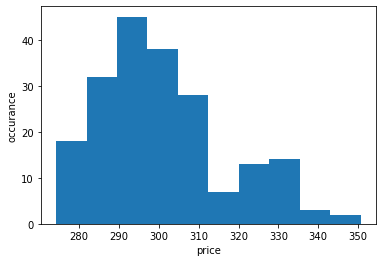

In [42]:
import matplotlib.pyplot as plt

prices = []
for r in result:
    prices.append(r["price"])
    
plt.hist(prices)
plt.xlabel("price")
plt.ylabel("occurance")

## **Asymmetric test cases**

### #buyers > #items

In [25]:
starting_prices = np.random.normal(300, 15, 30)
auctions = [auction.Auctioneer(starting_prices[i], 10, "auc%d"%i) for i in range(30)]
buyers = [auction.Buyer(auctions, 5000, preference_function, "buy%d"%i) for i in range(100)]

In [26]:
result = auction.run_auctions(auctions, buyers)

In [27]:
successful_buyers = []
for r in result:
    if r["buyer_id"] in successful_buyers: raise(ValueError)
    successful_buyers.append(r["buyer_id"])

Text(0, 0.5, 'occurance')

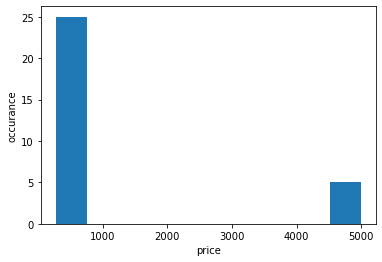

In [28]:
import matplotlib.pyplot as plt

prices = []
for r in result:
    prices.append(r["price"])
    
plt.hist(prices)
plt.xlabel("price")
plt.ylabel("occurance")

### #buyers < #items

In [57]:
starting_prices = np.random.normal(300, 15, 228)
auctions = [auction.Auctioneer(starting_prices[i], 10, "auc%d"%i) for i in range(228)]
buyers = [auction.Buyer(auctions, 1000, preference_function, "buy%d"%i) for i in range(200)]

In [58]:
result = auction.run_auctions(auctions, buyers)

23 out of 228 auctions are won
27 out of 205 auctions are won
27 out of 178 auctions are won
26 out of 151 auctions are won
27 out of 125 auctions are won
27 out of 98 auctions are won
24 out of 71 auctions are won
19 out of 47 auctions are won


In [63]:
successful_buyers = []
term_auctions = []
for r in result:
    if r["buyer_id"] in successful_buyers: raise(ValueError)
    if r["auction_id"] in term_auctions: raise(ValueError)
    successful_buyers.append(r["buyer_id"])
    term_auctions.append(r["auction_id"])

In [61]:
result

[{'auction_id': 'auc14', 'buyer_id': 'buy26', 'price': 281.4494851119183},
 {'auction_id': 'auc22', 'buyer_id': 'buy29', 'price': 282.0007799706831},
 {'auction_id': 'auc31', 'buyer_id': 'buy7', 'price': 272.7246624699657},
 {'auction_id': 'auc42', 'buyer_id': 'buy17', 'price': 278.14236545090097},
 {'auction_id': 'auc44', 'buyer_id': 'buy9', 'price': 274.8506689491635},
 {'auction_id': 'auc56', 'buyer_id': 'buy8', 'price': 273.86404884316016},
 {'auction_id': 'auc59', 'buyer_id': 'buy20', 'price': 279.57739663759827},
 {'auction_id': 'auc79', 'buyer_id': 'buy11', 'price': 275.65547783489234},
 {'auction_id': 'auc80', 'buyer_id': 'buy12', 'price': 275.8752869081456},
 {'auction_id': 'auc92', 'buyer_id': 'buy24', 'price': 281.05171603802546},
 {'auction_id': 'auc93', 'buyer_id': 'buy13', 'price': 275.9256136910216},
 {'auction_id': 'auc104', 'buyer_id': 'buy18', 'price': 278.74862610883105},
 {'auction_id': 'auc107', 'buyer_id': 'buy10', 'price': 275.4624766288468},
 {'auction_id': 'auc

Text(0, 0.5, 'occurance')

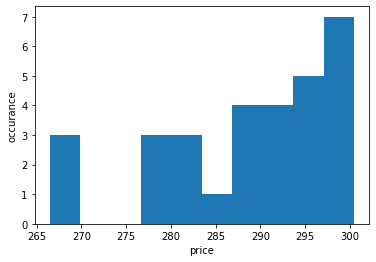

In [32]:
import matplotlib.pyplot as plt

prices = []
for r in result:
    prices.append(r["price"])
    
plt.hist(prices)
plt.xlabel("price")
plt.ylabel("occurance")